# Logistic Regression


In [1]:
# Load the data
import pandas as pd
from sklearn import metrics
data = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data.to_csv('data.csv')
del data

In [2]:
# First, import helpful Python tools for loading/navigating data
import os             # Good for navigating your computer's files 
import numpy as np    # Great for lists (arrays) of numbers
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv)

In [3]:
data_path  = 'data.csv'

In [4]:
# Use the 'pd.read_csv('file')' function to read in read our data and store it in a variable called 'dataframe'
dataframe = pd.read_csv(data_path)

In [6]:
# Let's look at just a few of the biopsy sample features to start by subsetting our 'dataframe'
dataframe = dataframe[['diagnosis','radius_mean','area_mean', 'radius_se', 'area_se', 'smoothness_mean','smoothness_se']]

You can think of dataframes like Google or Microsoft Excel spreadsheets (large tables with row/column headers) 

**Use the 'head()' method to show the first five rows of the table and their corresponding column headers (our 7 biopsy features!)**

In [7]:
dataframe.head()

,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se
0,1,17.99,1001.0,1.0950,153.40,0.11840,0.006399
1,1,20.57,1326.0,0.5435,74.08,0.08474,0.005225
2,1,19.69,1203.0,0.7456,94.03,0.10960,0.006150
3,1,11.42,386.1,0.4956,27.23,0.14250,0.009110
4,1,20.29,1297.0,0.7572,94.44,0.10030,0.011490



* $diagnosis$: Whether or not the tumor was diagnosed as malignant (M) or benign (B).
* $radius$_$mean$: The radius data feature, averaged across cells in that particular biopsy
* $area$_$mean$: The area data feature, averaged across cells in that particular biopsy
* $radius$_$se$: The standard error of the radius data feature for cells in that particular biopsy
* $area$_$se$: The standard error of the area data feature for cells in that particular biopsy
* $smoothness$_$mean$: The smoothness feature, averaged across cells in that particular biopsy
* $smoothness$_$se$: The standard error of the smoothness data feature for cells in that particular biopsy

Recall that the term mean refers to taking an average (summing the values for each cell and dividing by the total number of cells observed in that biopsy). Additionally, standarded error gives a sense of the standard deviation (how much variance there is between cells in that biopsy for that feature). 

In [8]:
# Next, we'll use the 'info' method to see the data types of each column
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   diagnosis        569 non-null    int64  
 1   radius_mean      569 non-null    float64
 2   area_mean        569 non-null    float64
 3   radius_se        569 non-null    float64
 4   area_se          569 non-null    float64
 5   smoothness_mean  569 non-null    float64
 6   smoothness_se    569 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 31.2 KB


In [9]:
# First, we'll import some handy data visualization tools
import seaborn as sns
import matplotlib.pyplot as plt 

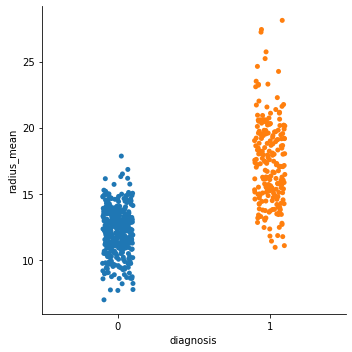

In [10]:
# To see how well mean radius correlates with diagnosis, we'll plot the data
# separated based on diagnosis category on the x-axis and have the points' y-value
# be its mean radius value

sns.catplot(x = 'diagnosis', y = 'radius_mean', data = dataframe)

Next, we might want to check just how well mean radius can be used to classify, or separate, the datapoints in either category
Let's pick a boundary value for the radius mean and see how well it separates the data

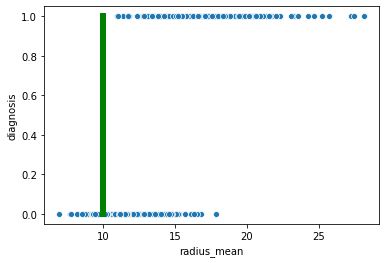

In [11]:
boundary = 10
sns.scatterplot(x = 'radius_mean', y = 'diagnosis', data = dataframe)
plt.plot([boundary, boundary], [0, 1], 'g', linewidth = 6)

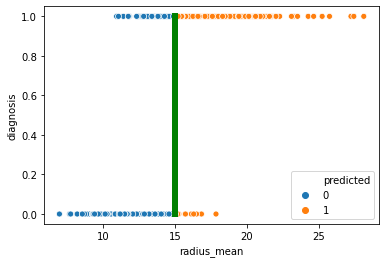

In [12]:
def boundary_classifier(target_boundary,x):
  result = []
  for i in x:
    if i > target_boundary:
      result.append(1)
    else:
      result.append(0)
  return result
     
chosen_boundary = 15
y_pred = boundary_classifier(chosen_boundary, dataframe['radius_mean'])
dataframe['predicted'] = y_pred
y_true = dataframe['diagnosis']
sns.scatterplot(x = 'radius_mean', y = 'diagnosis', hue = 'predicted', data = dataframe)
plt.plot([chosen_boundary, chosen_boundary], [0, 1], 'g', linewidth = 6)


In [13]:
accuracy = metrics.accuracy_score(y_true,y_pred)
accuracy

0.8892794376098418

Text(0.5, 257.44, 'Predicted diagnosis')

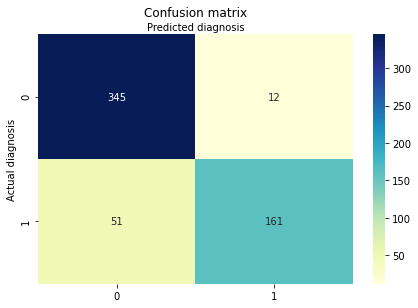

In [14]:
# Import the metrics class
from sklearn import metrics

# Create the Confusion Matrix
y_test = dataframe['diagnosis']
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

In [15]:
# YOUR CODE HERE:  
def model_stats(y_test, y_pred):
  print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
  print("Precision: ", metrics.precision_score(y_test, y_pred))
  print("Recall: ", metrics.recall_score(y_test, y_pred))

In [16]:
model_stats(y_test, y_pred)

Accuracy:  0.8892794376098418
Precision:  0.930635838150289
Recall:  0.7594339622641509


# Finding a better separation with logistic regression


In [17]:
# Let's pull our handy linear fitter from our 'prediction' toolbox: sklearn!
from sklearn import linear_model

In [18]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataframe, test_size = 0.4, random_state = 1)


In [19]:
print('\n\nTraining dataframe has %d rows'%train_df.shape[0])
train_df.head()



Training dataframe has 341 rows


,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se,predicted
164,1,23.270,1686.0,0.6642,97.85,0.08439,0.004910,1
13,1,15.850,782.7,0.4033,36.58,0.08401,0.009769,1
430,1,14.900,685.0,0.2530,24.19,0.09947,0.006965,0
61,0,8.598,221.8,0.3582,18.39,0.12430,0.011930,0
427,0,10.800,359.9,0.3077,20.20,0.08801,0.006543,0


In [20]:
print('\n\nTesting dataframe has %d rows'%test_df.shape[0])
test_df.head()



Testing dataframe has 228 rows


,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se,predicted
421,0,14.69,656.1,0.5462,49.45,0.10310,0.009976,0
47,1,13.17,534.6,0.2871,24.25,0.11580,0.006532,0
292,0,12.95,513.7,0.2094,17.67,0.10050,0.008725,0
186,1,18.31,1041.0,0.2577,28.92,0.08588,0.002866,1
414,1,15.13,719.5,0.4681,45.38,0.08320,0.006831,1


In [21]:
input_labels = ['radius_mean']
output_label = 'diagnosis'


x_train = train_df[input_labels]
print('Our x variables')
print(x_train.head())
print('\n\n')

y_train = train_df[output_label]
print('Our y variable:')
print(y_train.head())

Our x variables
     radius_mean
164       23.270
13        15.850
430       14.900
61         8.598
427       10.800



Our y variable:
164    1
13     1
430    1
61     0
427    0
Name: diagnosis, dtype: int64


In [22]:
# Here, we create a 'reg' object that handles the line fitting for us!
class_rm = linear_model.LogisticRegression()

In [23]:
class_rm = linear_model.LogisticRegression()
class_rm.fit(x_train, y_train)

LogisticRegression()

In [24]:
x_test = test_df[input_labels]

In [25]:
y_test = test_df[output_label].values.squeeze()

In [26]:
y_pred = class_rm.predict(x_test)

In [27]:
print(y_pred)

[1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 1]


Run the code below to visualize the results

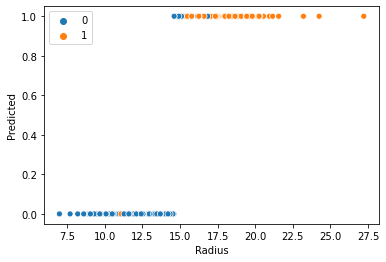

In [28]:
y_pred = y_pred.squeeze()
x_test_view = x_test[input_labels].values.squeeze()
sns.scatterplot(x = x_test_view, y = y_pred, hue = y_test)
plt.xlabel('Radius')
plt.ylabel('Predicted')
plt.legend()

In [29]:
model_stats(y_test, y_pred)

Accuracy:  0.8552631578947368
Precision:  0.7831325301204819
Recall:  0.8125


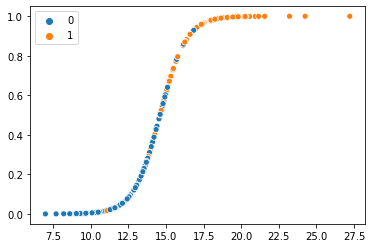

In [30]:
# Let's visualize the probabilities for `x_test`
y_prob = class_rm.predict_proba(x_test)
sns.scatterplot(x = x_test_view, y = y_prob[:,1], hue = y_test)